### Libraries
---

In [35]:
from easygui import fileopenbox
from librosa import load
import os

# Extract The Original Emotion Details from File Name
---

In [36]:
emotion_dictionary = {
        1:'neutral',
        2:'calm',
        3:'happy',
        4:'sad',
        5:'angry',
        6:'fearful',
        7:'disgust',
        8:'surprised'
    }

## Encoding Categories
---

In [37]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import load_model
import numpy as np

In [38]:
categories = np.array(list(emotion_dictionary.values())).reshape(-1,1)
print(categories)
Ohe = OneHotEncoder(handle_unknown="ignore")
v = Ohe.fit_transform(categories).toarray()
Ohe.get_feature_names_out()

[['neutral']
 ['calm']
 ['happy']
 ['sad']
 ['angry']
 ['fearful']
 ['disgust']
 ['surprised']]


array(['x0_angry', 'x0_calm', 'x0_disgust', 'x0_fearful', 'x0_happy',
       'x0_neutral', 'x0_sad', 'x0_surprised'], dtype=object)

In [57]:
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select the model you want to use
----

In [43]:
model_path = fileopenbox(default=os.path.abspath("Models"),filetypes="\*.h5")

----
### Loading the Model & Compiling it

In [44]:
model = load_model(model_path)

---
### Print the Model Summary

In [56]:
model.summary()

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_182 (Conv1D)          (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_182 (MaxPoolin (None, 54, 256)           0         
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 18, 256)           590080    
_________________________________________________________________
max_pooling1d_183 (MaxPoolin (None, 4, 256)            0         
_________________________________________________________________
dropout_182 (Dropout)        (None, 4, 256)            0         
_________________________________________________________________
flatten_91 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_182 (Dense)            (None, 128)             

#### Make The Model Image Plot
---

In [45]:
model_path
model_image_path = model_path.split("\\")[-1].split(".")[0]
model_image_path

'model_3_80_20_13'

## Plot the model structure
---

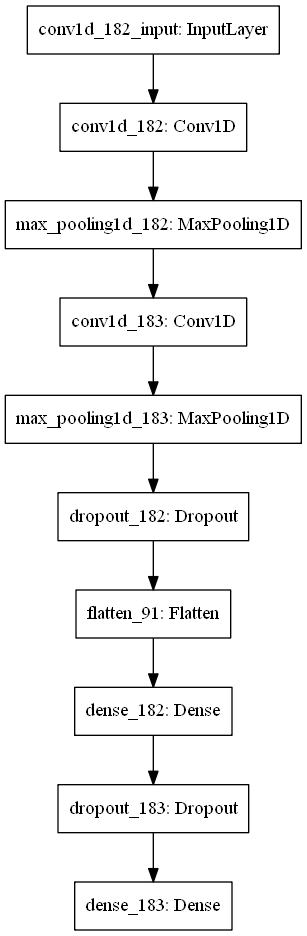

In [46]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file=f"Model_Image\\{model_image_path}.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None
)

----
# Prediction
----

#### SELECT THE TEST DATA FILE
---

In [58]:
path_to_test_data = fileopenbox(default=os.path.abspath("Final_Test_Data"),filetypes="\*.csv")

#### LOAD DATA

In [59]:
import pandas as pd
data_df =  pd.read_csv(path_to_test_data,index_col=False)
data_df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.300184,0.738577,0.742603,0.724332,0.726936,0.683394,0.653090,0.696985,0.748464,0.751690,...,0.000004,0.000003,0.000002,0.000002,0.000005,0.000008,0.000005,0.000002,1.642310e-07,neutral
1,0.270354,0.683518,0.730694,0.716595,0.679522,0.675306,0.669987,0.631418,0.686722,0.713734,...,0.000007,0.000007,0.000007,0.000007,0.000012,0.000009,0.000008,0.000003,1.788962e-07,neutral
2,0.307369,0.716178,0.761089,0.758008,0.758388,0.734855,0.649470,0.630941,0.680735,0.738601,...,0.000013,0.000013,0.000015,0.000020,0.000028,0.000048,0.000025,0.000008,6.468821e-07,neutral
3,0.298019,0.768713,0.744220,0.736126,0.739507,0.687656,0.680441,0.684369,0.737645,0.710171,...,0.000020,0.000019,0.000025,0.000080,0.000040,0.000037,0.000031,0.000010,6.636600e-07,neutral


In [48]:
X=data_df.iloc[:,:-1].values
Y = data_df['labels'].values

In [49]:
Y

array(['neutral', 'neutral', 'neutral', ..., 'surprised', 'surprised',
       'surprised'], dtype=object)

In [50]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
Y = Ohe.fit_transform(Y.reshape(-1,1)).toarray()

In [51]:
# making our data compatible to model.
x_test = np.expand_dims(X, axis=2)

x_test.shape, Y.shape

((1440, 162, 1), (1440, 8))

In [52]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,Y)[1]*100 , "%")

45/45 [==============================] - 0s 5ms/step - loss: 0.7149 - accuracy: 0.8625
Accuracy of our model on test data :  86.2500011920929 %


In [53]:
pred_test = model.predict(x_test)
y_pred = Ohe.inverse_transform(pred_test)

y_test = Ohe.inverse_transform(Y)

In [54]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.tail(5)

,Predicted Labels,Actual Labels
1435,surprised,surprised
1436,surprised,surprised
1437,surprised,surprised
1438,surprised,surprised
1439,surprised,surprised


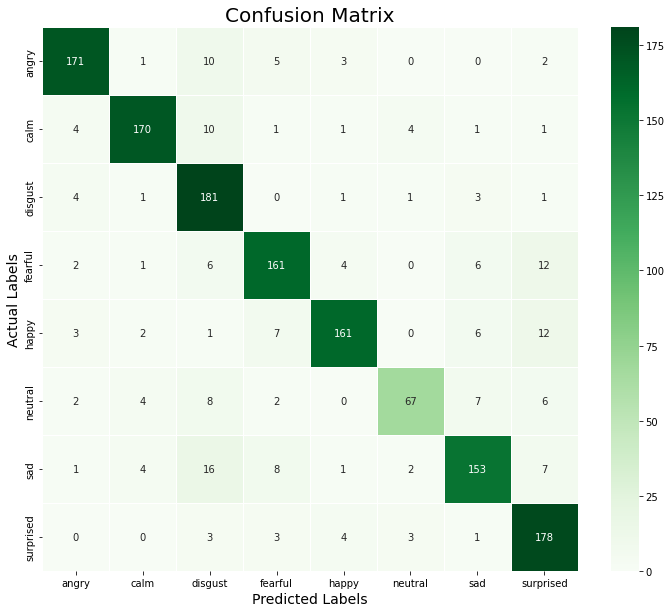

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in Ohe.categories_] , columns = [i for i in Ohe.categories_])
sns.heatmap(cm, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()